In [28]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
file = 'logins.json'
with open(file) as train_file:
    dict_train = json.load(train_file)
print dict_train.keys()

train_df=pd.DataFrame(dict_train)
train_df.describe()


[u'login_time']


,login_time
count,93142
unique,92265
top,1970-01-09 01:31:25
freq,3


Note:  There are missing 877 missing values.

In [3]:
train_df['ldate']=train_df.apply(lambda x: x.login_time.split(' ')[0],axis=1)
train_df['ltime']=train_df.apply(lambda x: x.login_time.split(' ')[1],axis=1)

train_df['year']=train_df.apply(lambda x: x.ldate.split('-')[0],axis=1).astype(int)
train_df['month']=train_df.apply(lambda x: x.ldate.split('-')[1],axis=1).astype(int)
train_df['day']=train_df.apply(lambda x: x.ldate.split('-')[2],axis=1).astype(int)

train_df['hour']=train_df.apply(lambda x: x.ltime.split(':')[0],axis=1).astype(int)
train_df['minute']=train_df.apply(lambda x: x.ltime.split(':')[1],axis=1).astype(int)
train_df['second']=train_df.apply(lambda x: x.ltime.split(':')[2],axis=1).astype(int)

train_df.head()

,login_time,ldate,ltime,year,month,day,hour,minute,second
0,1970-01-01 20:13:18,1970-01-01,20:13:18,1970,1,1,20,13,18
1,1970-01-01 20:16:10,1970-01-01,20:16:10,1970,1,1,20,16,10
2,1970-01-01 20:16:37,1970-01-01,20:16:37,1970,1,1,20,16,37
3,1970-01-01 20:16:36,1970-01-01,20:16:36,1970,1,1,20,16,36
4,1970-01-01 20:26:21,1970-01-01,20:26:21,1970,1,1,20,26,21


In [4]:
def get_range(things):
    return (max(things),min(things))

print train_df.describe()
my_cols=['year','month','day','hour','minute','second']
for c in my_cols:
    print c,get_range(train_df[c])

          year         month           day          hour        minute  \
count  93142.0  93142.000000  93142.000000  93142.000000  93142.000000   
mean    1970.0      2.424062     14.667830     11.635363     29.801711   
std        0.0      0.995154      8.596967      7.816792     17.245034   
min     1970.0      1.000000      1.000000      0.000000      0.000000   
25%     1970.0      2.000000      7.000000      4.000000     15.000000   
50%     1970.0      3.000000     14.000000     12.000000     30.000000   
75%     1970.0      3.000000     22.000000     19.000000     45.000000   
max     1970.0      4.000000     31.000000     23.000000     59.000000   

             second  
count  93142.000000  
mean      29.619033  
std       17.319278  
min        0.000000  
25%       15.000000  
50%       30.000000  
75%       45.000000  
max       59.000000  
year (1970, 1970)
month (4, 1)
day (31, 1)
hour (23, 0)
minute (59, 0)
second (59, 0)


Some overview on the login data:
1. date: A single year in included: 1970
2. Four unique months are represented(January through April)
3. Each day in the month is present
4. All minutes and seconds are present.

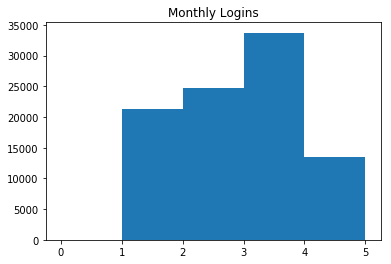

In [5]:
bins=range(6)
plt.hist(train_df.month,bins=bins)
plt.title('Monthly Logins')
plt.show()

Note: April data looks like it may be incomplete.  Check specific days for each month

In [6]:
months=sorted(train_df.month.unique())
#dim = days in month
dim=[]
for m in months:
    print 'Month',m,'days represented:', sorted(set(train_df.day[train_df.month==m]))
    dim.append(len(sorted(set(train_df.day[train_df.month==m]))))

Month 1 days represented: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Month 2 days represented: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
Month 3 days represented: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Month 4 days represented: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


Note:  April is cut off at the 13th of the month.  It is possible that there is an issue with that (note the missing values above are one possibility ie: some data corruption) No explanation given though, so remainder of analyis will be done through April 13th.

Let's take a quick look at normalized average daily login numbers:

In [7]:
for m in months:
    tmp=train_df.loc[train_df.month==m,:]
    print 'Average daily logins for month {} was {:4.1f}'\
    .format(m,float(tmp.day.count())/dim[m-1])

Average daily logins for month 1 was 685.1
Average daily logins for month 2 was 881.2
Average daily logins for month 3 was 1087.8
Average daily logins for month 4 was 1039.0


In the interest of time, I make no allowances for the weekends, but from this data we can see that the average daily login count is trending up, and the slight drop in daily logins for April may or may not be explained by the problem data.

Next, let's look at login data in the requested 15 minutes intervals.

          zipper  day      indy
0  (1, 1, 20, 0)    2  1 1 20 0
1  (1, 1, 20, 1)    6  1 1 20 1
2  (1, 1, 20, 2)    9  1 1 20 2
3  (1, 1, 20, 3)    7  1 1 20 3
4  (1, 1, 21, 0)    1  1 1 21 0


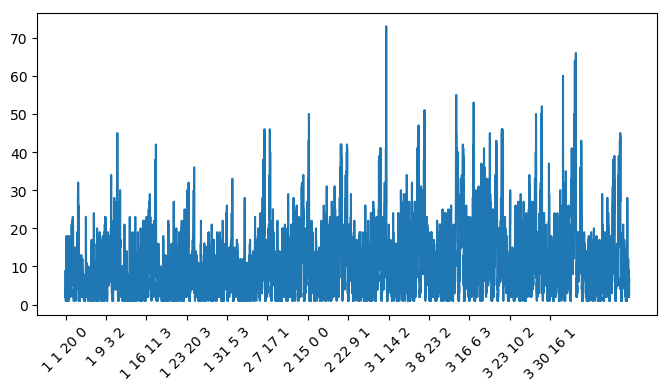

In [8]:
train_df['quarter_hr']=(train_df.minute/15).apply(int)
train_df['zipper']=zip(train_df.month,train_df.day,train_df.hour,train_df.quarter_hr)
tmp=train_df.pivot_table(index=['zipper'],values='day',aggfunc='count')
tmp.reset_index(drop=False,inplace=True)
tmp['indy']=tmp.apply(lambda x: reduce(lambda y,z: str(y)+' '+ str(z),x.zipper),axis=1)
print tmp.head()
plt.figure(figsize=(8,4),dpi=100)
plt.plot(tmp.day)
week=7*24*4
plt.xticks([x*week for x in range(len(tmp.day)/week)],[tmp.indy[x*week] for x in range(len(tmp.indy)/week)],rotation=45)
plt.show()

There is clear period activity in the data.  This scale is too small to make sense of the data, so I will look at each week in Month 3 which is a large month.

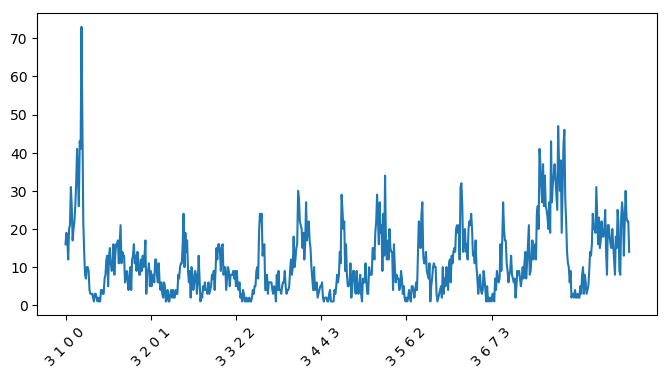

In [9]:
tmp2=train_df.loc[(train_df.month==3) & (train_df.day<8),:]
tmp=tmp2.pivot_table(index=['zipper'],values='day',aggfunc='count')
tmp.reset_index(drop=False,inplace=True)
tmp['indy']=tmp.apply(lambda x: reduce(lambda y,z: str(y)+' '+ str(z),x.zipper),axis=1)

plt.figure(figsize=(8,4),dpi=100)
plt.plot(tmp.day)
day=4*24
plt.xticks([x*day for x in range(len(tmp.day)/day)],[tmp.indy[x*day] for x in range(len(tmp.day)/day)],rotation=45)
plt.show()

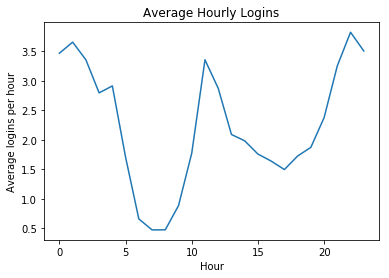

In [10]:
hours=train_df.pivot_table(index='hour',values='minute',aggfunc='count')
trial_days=31+28+13
trial_hours=trial_days*24
plt.plot(hours/trial_hours)
plt.title('Average Hourly Logins')
plt.ylabel('Average logins per hour')
plt.xlabel('Hour')
plt.show()

At this location, the typical highest load for user logins paks in both the midnight and mid day time frames.  We could speculate that this is traffic from people trying to get to lunch appointments from work and home from bars, restaurants and other recreational venues in the evening, but there isn't enough information to do more than speculate.  Surprisingly, in the typical morning commute hours (6-9am) represnets the minimum load time.

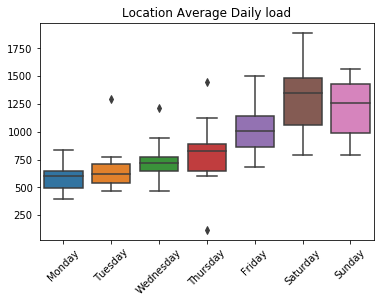

In [11]:
import datetime
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
train_df['Weekday']=train_df.apply(lambda x: datetime.date(x.year,x.month,x.day).strftime("%A"),axis=1)
tmp=train_df.pivot_table(index='ldate',columns='Weekday',values='ltime',aggfunc='count')
tmp2=pd.DataFrame()
for d in weekdays:
    tmp2[d]=tmp[d]
sns.boxplot(data=tmp2)
plt.xticks(rotation=45)
plt.title('Location Average Daily load')
plt.show()

It is immediately clear from the boxplot above that the weekend load for this location is the highest of the week, supporting the idea that this is a recreational area.

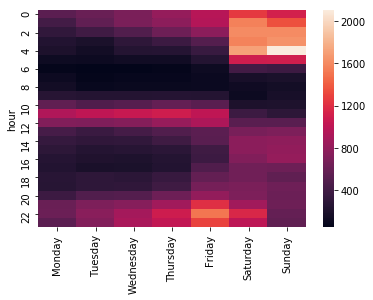

In [12]:
tmp=train_df.pivot_table(index='hour',columns='Weekday',values='ltime',aggfunc='count')
tmp2=pd.DataFrame()
for d in weekdays:
    tmp2[d]=tmp[d]
sns.heatmap(data=tmp2)
plt.show()

The heatmap above (sorted to have the weekends together) supports the idea that the busiest times for this location are very early morning on Saturday and Sunday, or in more practical terms, latenight Friday and Saturday, after entertainment venues close.  

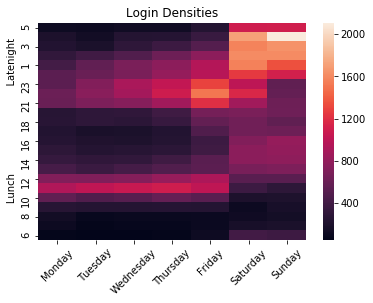

In [17]:
hour_indy=[20, 21, 22, 23,0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
hour_indy=[5,4,3,2,1,0,23,22,21,19,18,17,16,15,14,13,12,11,10,9,8,7,6]
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

tmp3=pd.DataFrame(index=hour_indy,columns=weekdays)

for i in tmp3.index:
    for c in tmp3.columns:
        tmp3.loc[i,c]=tmp.loc[i,c]

tmp3=tmp3.astype(float)
pal=sns.color_palette("Blues")
#print pal
sns.heatmap(data=tmp3)
plt.title('Login Densities')
plt.ylabel('       Lunch                            Latenight')
plt.xticks(rotation=45)
plt.show()


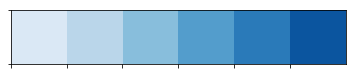

In [16]:
#Let's clean up the graphs to present as a single set with same color scheme

sns.palplot(sns.color_palette("Blues"))
plt.show()

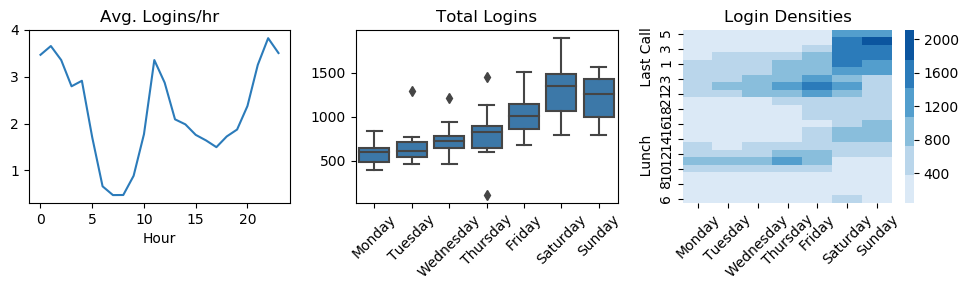

In [34]:
# Do all four main plots for summary

pal=sns.color_palette("Blues")
plt.subplots(nrows=2,ncols=2,figsize=(10,3),dpi=100)

#plt.subplot(2,2,1)
#bins=range(6)
#plt.hist(train_df.month,bins=bins,color=pal[4])
#plt.title('Monthly Logins')
#plt.xlabel('Month')

plt.subplot(1,3,1)
hours=train_df.pivot_table(index='hour',values='minute',aggfunc='count')
trial_days=31+28+13
trial_hours=trial_days*24
plt.plot(hours/trial_hours,color=pal[4])
plt.title('Avg. Logins/hr')
plt.xlabel('Hour')

plt.subplot(1,3,2)
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
train_df['Weekday']=train_df.apply(lambda x: datetime.date(x.year,x.month,x.day).strftime("%A"),axis=1)
tmp=train_df.pivot_table(index='ldate',columns='Weekday',values='ltime',aggfunc='count')
tmp2=pd.DataFrame()
for d in weekdays:
    tmp2[d]=tmp[d]
    
sns.boxplot(data=tmp2,color=pal[4])
plt.xticks(rotation=45)
plt.title('Total Logins')



plt.subplot(1,3,3)

tmp=train_df.pivot_table(index='hour',columns='Weekday',values='ltime',aggfunc='count')
tmp2=pd.DataFrame()
for d in weekdays:
    tmp2[d]=tmp[d]

hour_indy=[20, 21, 22, 23,0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
hour_indy=[5,4,3,2,1,0,23,22,21,19,18,17,16,15,14,13,12,11,10,9,8,7,6]
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

tmp3=pd.DataFrame(index=hour_indy,columns=weekdays)

for i in tmp3.index:
    for c in tmp3.columns:
        tmp3.loc[i,c]=tmp.loc[i,c]
        
tmp3=tmp3.astype(float)
sns.heatmap(data=tmp3,cmap=pal)

plt.title('Login Densities')
plt.ylabel('       Lunch           Last Call')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Overview.png')
plt.show()
